In [1]:
import numpy as np
import pandas as pd

In [2]:
# import data

data = pd.read_csv('D:/KULIAHHH/TUGAS AKHIR/TA-2/datasampel/fktp_not_transformation.csv')

In [3]:
data.drop(['Unnamed: 0', 'ID Kunjungan', 'Nomor Peserta', 'FKTP-tanggal datang', 'FKTP-tanggal pulang', 'Segmen Peserta yang Terdaftar', 'Kepemilikan Faskes yang Terdaftar', 
         'Jenis Faskes yang Terdaftar', 'Provinsi Peserta Terdaftar', 'Kab/Kota Peserta Terdaftar', 'FKTP-Kab/Kota Faskes Rujukan', 'FKTP-Kab/Kota Faskes', 'FKTP-Provinsi Faskes Rujukan', 'FKTP-Kab/Kota Faskes Rujukan', 'FKTP-Kepemilikan Faskes Rujukan', 'FKTP-Jenis Faskes Rujukan',
        'FKTP-Jenis Kunjungan', 'FKTP-Poli Faskes Rujukan', 'FKTP-Provinsi Faskes', 'kategori umur', 'Status Kawin', 'Hubungan Keluarga', 'FKTP-Year', 'FKTP-Month', 'FKTP-Kode dan Nama Diagnosis', 'Kapitasi?', 'FKTP-Biaya Verifikasi'], axis=1, inplace=True)

In [4]:
print("The number of numerical variables in the dataset : {}".format(data.select_dtypes(include=[np.number]).shape[1]))
print("The number of categorical variables in the dataset : {}".format(data.select_dtypes(exclude=[np.number]).shape[1]))

The number of numerical variables in the dataset : 6
The number of categorical variables in the dataset : 15


In [5]:
data_num = data.select_dtypes(include=[np.number])
data_cat = data.select_dtypes(exclude=[np.number])

## **Dimensionality Reduction with MCA**

In [6]:
pip install prince

Note: you may need to restart the kernel to use updated packages.


In [7]:
import prince
mca = prince.MCA(n_components=5, n_iter=3, copy=True, check_input=True, engine='auto', random_state=42)

In [8]:
mca = mca.fit(data_cat)

In [9]:
mca.eigenvalues_

[0.341427806102252,
 0.2795933192255481,
 0.17968007351708404,
 0.1659638487672585,
 0.147768127393982]

In [10]:
mca.total_inertia_

6.866666666666666

In [11]:
mca.explained_inertia_

[0.04972249603430855,
 0.04071747367362351,
 0.0261670009976336,
 0.02416949253892114,
 0.02151963020300709]

In [12]:
final_component = mca.transform(data_cat)

In [13]:
from numpy.core.defchararray import add

final_component = final_component.assign(new=add('', np.arange(1, len(final_component) + 1).astype(str)))

In [14]:
final_component.rename(columns = {0 : 'first_component_mca', 1 : 'second_component_mca', 2 : 'third_component_mca', 3:'fourth_component_mca', 4:'fifth_component_mca'}, inplace = True)

In [15]:
final_component

,first_component_mca,second_component_mca,third_component_mca,fourth_component_mca,fifth_component_mca,new
0,-0.531136,-1.363312,2.180885,-0.388911,-0.450070,1
1,-0.656355,-1.496469,1.741451,-0.222060,-0.186666,2
2,-0.569351,-1.040713,0.424713,-0.102001,0.027576,3
3,-0.579249,-1.345868,2.296480,-0.380025,-0.188862,4
4,-0.431465,-0.642478,0.626789,-0.121582,0.065384,5
...,...,...,...,...,...,...
1733750,1.231270,-0.853455,-0.221010,-0.030807,0.038293,1733751
1733751,1.231270,-0.853455,-0.221010,-0.030807,0.038293,1733752
1733752,1.237051,-0.863042,-0.228519,-0.024249,0.039792,1733753
1733753,1.474406,0.069505,0.208592,-0.007632,0.418886,1733754


## **Dimensionality Reduction with PCA**

### Correlation

In [16]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = data_num.corr()
# corrMatrix
corrMatrix.style.background_gradient(cmap='coolwarm')

,Jumlah Tindakan Non-Kapitasi,FKTP-Biaya Tagih,FKTP-Lama Kunjungan,FKTP-Weekend?,FKTP-Quarter,Umur
Jumlah Tindakan Non-Kapitasi,1.000000,0.753939,0.076596,0.059383,0.000072,-0.010630
FKTP-Biaya Tagih,0.753939,1.000000,0.111208,0.048271,-0.010833,-0.026754
FKTP-Lama Kunjungan,0.076596,0.111208,1.000000,0.008498,-0.007350,-0.001712
FKTP-Weekend?,0.059383,0.048271,0.008498,1.000000,0.007972,-0.017904
FKTP-Quarter,0.000072,-0.010833,-0.007350,0.007972,1.000000,0.002127
Umur,-0.010630,-0.026754,-0.001712,-0.017904,0.002127,1.000000


In [17]:
from sklearn.preprocessing import MinMaxScaler
# normalizing the data
X_std = MinMaxScaler(feature_range=(0, 1)).fit_transform(data_num)

In [18]:
from sklearn.cluster import KMeans # Our clustering algorithm
from sklearn.decomposition import PCA # Needed for dimension reduction
pca = PCA()
pca.fit(X_std)

PCA()

Text(0, 0.5, 'Cummulative Explained Variance')

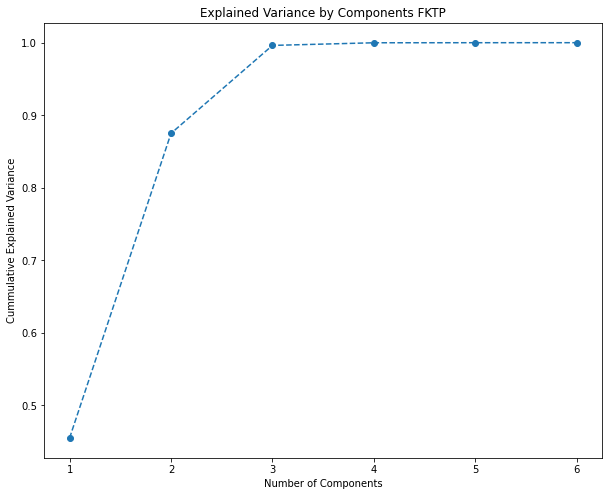

In [19]:
from matplotlib import*
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.plot(range(1,7), pca.explained_variance_ratio_.cumsum(), marker ='o', linestyle='--')
plt.title('Explained Variance by Components FKTP')
plt.xlabel('Number of Components')
plt.ylabel('Cummulative Explained Variance')


In [20]:
pca = PCA(n_components=3)
pca.fit(X_std)
final_principal = pca.transform(X_std)

In [21]:
final_principal

array([[ 0.45074492, -0.20293334,  0.27550007],
       [-0.21269971, -0.13004524, -0.17619359],
       [-0.54434139, -0.0973717 , -0.1284434 ],
       ...,
       [ 0.11903903, -0.17016593,  0.27624779],
       [ 0.11895291, -0.16592072, -0.03504339],
       [-0.21276157, -0.1298626 , -0.23259102]])

In [22]:
final_principal = pd.DataFrame(final_principal)

In [23]:
final_principal

,0,1,2
0,0.450745,-0.202933,0.275500
1,-0.212700,-0.130045,-0.176194
2,-0.544341,-0.097372,-0.128443
3,0.450670,-0.199098,-0.007469
4,0.450672,-0.199114,-0.007454
...,...,...,...
1733750,0.450699,-0.203523,0.275701
1733751,0.119042,-0.170295,0.285681
1733752,0.119039,-0.170166,0.276248
1733753,0.118953,-0.165921,-0.035043


In [24]:
from numpy.core.defchararray import add

final_principal = final_principal.assign(new=add('', np.arange(1, len(final_principal) + 1).astype(str)))

In [25]:
final_principal

,0,1,2,new
0,0.450745,-0.202933,0.275500,1
1,-0.212700,-0.130045,-0.176194,2
2,-0.544341,-0.097372,-0.128443,3
3,0.450670,-0.199098,-0.007469,4
4,0.450672,-0.199114,-0.007454,5
...,...,...,...,...
1733750,0.450699,-0.203523,0.275701,1733751
1733751,0.119042,-0.170295,0.285681,1733752
1733752,0.119039,-0.170166,0.276248,1733753
1733753,0.118953,-0.165921,-0.035043,1733754


In [26]:
final_principal.rename(columns = {0 : 'first_component_pca', 1 : 'second_component_pca', 2 : 'third_component_pca'}, inplace = True)

In [27]:
final_attribut = pd.concat([final_principal, final_component], axis=1)

In [28]:
final_attribut

,first_component_pca,second_component_pca,third_component_pca,new,first_component_mca,second_component_mca,third_component_mca,fourth_component_mca,fifth_component_mca,new
0,0.450745,-0.202933,0.275500,1,-0.531136,-1.363312,2.180885,-0.388911,-0.450070,1
1,-0.212700,-0.130045,-0.176194,2,-0.656355,-1.496469,1.741451,-0.222060,-0.186666,2
2,-0.544341,-0.097372,-0.128443,3,-0.569351,-1.040713,0.424713,-0.102001,0.027576,3
3,0.450670,-0.199098,-0.007469,4,-0.579249,-1.345868,2.296480,-0.380025,-0.188862,4
4,0.450672,-0.199114,-0.007454,5,-0.431465,-0.642478,0.626789,-0.121582,0.065384,5
...,...,...,...,...,...,...,...,...,...,...
1733750,0.450699,-0.203523,0.275701,1733751,1.231270,-0.853455,-0.221010,-0.030807,0.038293,1733751
1733751,0.119042,-0.170295,0.285681,1733752,1.231270,-0.853455,-0.221010,-0.030807,0.038293,1733752
1733752,0.119039,-0.170166,0.276248,1733753,1.237051,-0.863042,-0.228519,-0.024249,0.039792,1733753
1733753,0.118953,-0.165921,-0.035043,1733754,1.474406,0.069505,0.208592,-0.007632,0.418886,1733754


In [29]:
final_attribut.drop(['new'], axis=1, inplace=True)

In [30]:
final_attribut

,first_component_pca,second_component_pca,third_component_pca,first_component_mca,second_component_mca,third_component_mca,fourth_component_mca,fifth_component_mca
0,0.450745,-0.202933,0.275500,-0.531136,-1.363312,2.180885,-0.388911,-0.450070
1,-0.212700,-0.130045,-0.176194,-0.656355,-1.496469,1.741451,-0.222060,-0.186666
2,-0.544341,-0.097372,-0.128443,-0.569351,-1.040713,0.424713,-0.102001,0.027576
3,0.450670,-0.199098,-0.007469,-0.579249,-1.345868,2.296480,-0.380025,-0.188862
4,0.450672,-0.199114,-0.007454,-0.431465,-0.642478,0.626789,-0.121582,0.065384
...,...,...,...,...,...,...,...,...
1733750,0.450699,-0.203523,0.275701,1.231270,-0.853455,-0.221010,-0.030807,0.038293
1733751,0.119042,-0.170295,0.285681,1.231270,-0.853455,-0.221010,-0.030807,0.038293
1733752,0.119039,-0.170166,0.276248,1.237051,-0.863042,-0.228519,-0.024249,0.039792
1733753,0.118953,-0.165921,-0.035043,1.474406,0.069505,0.208592,-0.007632,0.418886


### ** K-Means**

Menentukan jumlah cluster dengan elbow method

In [31]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(final_attribut)
    kmeanModel.fit(final_attribut)
 
    distortions.append(sum(np.min(cdist(final_attribut, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / final_attribut.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(final_attribut, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / final_attribut.shape[0]
    mapping2[k] = kmeanModel.inertia_

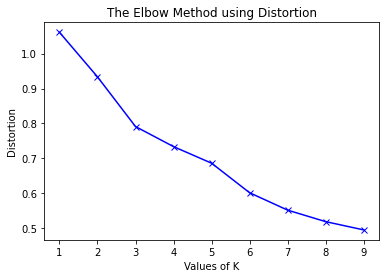

In [32]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

### Davies Bouldin Score

0.8808608167085912
1.267387975029309
1.0325568473304894
0.865542292092813
0.877307275175113
0.8594400276900548
0.9212718426165935


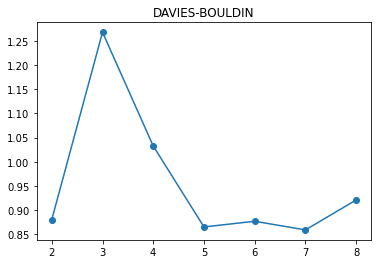

In [33]:
from sklearn.metrics import davies_bouldin_score
k = [2, 3, 4, 5, 6, 7, 8]
scores = []

for i in k:
    y_pred = KMeans(n_clusters = i, max_iter=1000, random_state = 43).fit_predict(final_attribut)
    score = davies_bouldin_score(final_attribut, y_pred)
    scores.append(score)
    print(score)

plt.plot(k, scores, 'o-')
plt.title('DAVIES-BOULDIN')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
k = [2, 3, 4, 5, 6, 7, 8]
score=[]
for n_cluster in k:
    kmeans = KMeans(n_clusters=n_cluster).fit(final_attribut)
    score.append(silhouette_score(final_attribut,kmeans.labels_))
    print(score)
plt.plot(k, score, 'o-')
plt.xlabel("Value for k")
plt.ylabel("Silhouette score")
plt.title('Silhouette Method')
plt.show()

[0.4587930123176231]
[0.4587930123176231, 0.31935869443656484]
[0.4587930123176231, 0.31935869443656484, 0.3327075621622098]


[0.45879301231762276]
[0.45879301231762276, 0.3193581147715615]
[0.45879301231762276, 0.3193581147715615, 0.3327095338000049]
[0.45879301231762276, 0.3193581147715615, 0.3327095338000049, 0.36500544191531137]
[0.45879301231762276, 0.3193581147715615, 0.3327095338000049, 0.36500544191531137, 0.3881782117018569]
[0.45879301231762276, 0.3193581147715615, 0.3327095338000049, 0.36500544191531137, 0.3881782117018569, 0.4095022762637515]
[0.45879301231762276, 0.3193581147715615, 0.3327095338000049, 0.36500544191531137, 0.3881782117018569, 0.4095022762637515, 0.3846063280639545]


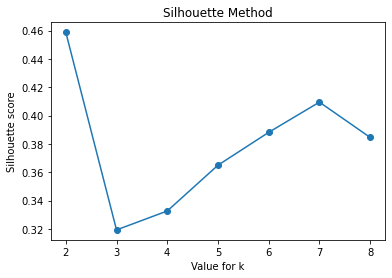

In [89]:
from sklearn.metrics import silhouette_score
k = [2, 3, 4, 5, 6, 7, 8]
score=[]
for n_cluster in k:
    kmeans = KMeans(n_clusters=n_cluster).fit(final_attribut)
    score.append(silhouette_score(final_attribut,kmeans.labels_))
    print(score)
plt.plot(k, score, 'o-')
plt.xlabel("Value for k")
plt.ylabel("Silhouette score")
plt.title('Silhouette Method')
plt.show()

##### n=2

In [35]:
kmeans_pca_2 = KMeans(n_clusters = 2, init ='k-means++', random_state=42)

In [36]:
# fit data dengan model kmeans pca
kmeans_pca_2.fit(final_attribut)

KMeans(n_clusters=2, random_state=42)

In [37]:
kmeans_pca_2.inertia_

1886612.608350062

#### n = 3

In [38]:
kmeans_pca = KMeans(n_clusters = 3, init ='k-means++', random_state=42)

In [39]:
# fit data dengan model kmeans pca
kmeans_pca.fit(final_attribut)

KMeans(n_clusters=3, random_state=42)

In [40]:
kmeans_pca.inertia_

1484833.0630101352

#### n=4

In [41]:
kmeans_pca_4 = KMeans(n_clusters = 4, init ='k-means++', random_state=42)

In [42]:
# fit data dengan model kmeans pca
kmeans_pca_4.fit(final_attribut)

KMeans(n_clusters=4, random_state=42)

In [43]:
kmeans_pca_4.inertia_

1209083.6578829894

#### n=5

In [44]:
kmeans_pca_5 = KMeans(n_clusters = 5, init ='k-means++', random_state=42)

In [45]:
# fit data dengan model kmeans pca
kmeans_pca_5.fit(final_attribut)

KMeans(n_clusters=5, random_state=42)

In [46]:
kmeans_pca_5.inertia_

944048.980004749

#### n=6

In [47]:
kmeans_pca_6 = KMeans(n_clusters = 6, init ='k-means++', random_state=42)

In [48]:
# fit data dengan model kmeans pca
kmeans_pca_6.fit(final_attribut)

KMeans(n_clusters=6, random_state=42)

In [49]:
kmeans_pca_6.inertia_

764171.3990699794

#### n=7

In [50]:
kmeans_pca_7 = KMeans(n_clusters = 7, init ='k-means++', random_state=42)

In [51]:
# fit data dengan model kmeans pca
kmeans_pca_7.fit(final_attribut)

KMeans(n_clusters=7, random_state=42)

In [52]:
kmeans_pca_7.inertia_

651373.1643998843

#### n=8

In [53]:
kmeans_pca_8 = KMeans(n_clusters = 8, init ='k-means++', random_state=42)

In [54]:
# fit data dengan model kmeans pca
kmeans_pca_8.fit(final_attribut)

KMeans(random_state=42)

In [55]:
kmeans_pca_8.inertia_

598475.9543132413

Analisis Hasil

In [56]:
fktp_not_transform = pd.read_csv('E:/Mata Kuliah/Semester 8/TugasAkhir II/Week 15/Data/fktp_not_transformation.csv')

In [57]:
fktp_segm_pca_kmeans = pd.concat([fktp_not_transform.reset_index(drop = True), pd.DataFrame(final_attribut)], axis = 1)
fktp_segm_pca_kmeans.columns.values[-8: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8']

fktp_segm_pca_kmeans['Cluster'] = kmeans_pca_6.labels_

In [58]:
fktp_segm_pca_kmeans['Segment'] = fktp_segm_pca_kmeans['Cluster'].map({0:'1', 1:'2', 2:'3', 3:'4', 4:'5', 5:'6'})

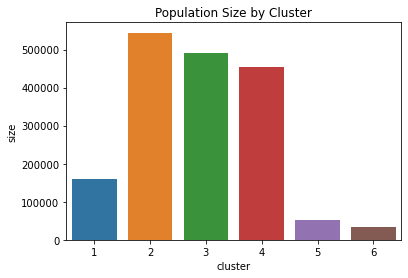

In [59]:
#Check size of each cluster - Are they all representative ?
import seaborn as sns
cluster_size = []
for centroid, cluster_df in fktp_segm_pca_kmeans.groupby("Segment"):
        cluster_size.append([centroid, len(cluster_df)])
cluster_sizes = pd.DataFrame(cluster_size, columns = ["cluster", "size"])
cluster_sizes.set_index("cluster", drop = True, inplace = True)
sns.barplot(x=cluster_sizes.index, y='size', data=cluster_sizes)
plt.title('Population Size by Cluster')
plt.show()

In [60]:
fktp_segm_pca_kmeans['Segment'].value_counts()

2    544196
3    491906
4    453456
1    160186
5     51590
6     32421
Name: Segment, dtype: int64

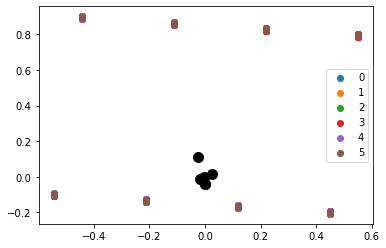

In [62]:
# Getting the Centroids
centroids = kmeans_pca_6.cluster_centers_
X = np.array(final_attribut)
label = kmeans_pca_6.labels_
u_labels = np.unique(label)

#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()

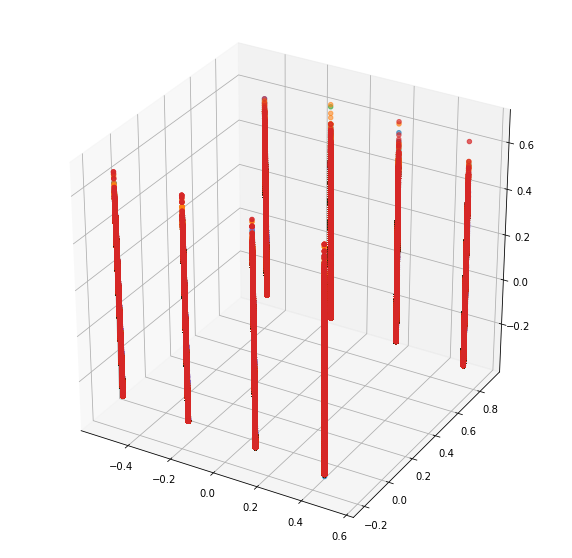

In [63]:
label = kmeans_pca_6.labels_
X = np.array(final_attribut)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[label == 0,0],X[label == 0,1],X[label == 0,2])
ax.scatter(X[label == 1,0],X[label == 1,1],X[label == 1,2])
ax.scatter(X[label == 2,0],X[label == 2,1],X[label == 2,2])
ax.scatter(X[label == 3,0],X[label == 3,1],X[label == 3,2])
ax.scatter(X[label == 4,0],X[label == 4,1],X[label == 4,2])
ax.scatter(X[label == 5,0],X[label == 5,1],X[label == 5,2])
# ax.scatter(final_principal[label == 5,0],final_principal[label == 5,1],final_principal[label == 5,2])

In [64]:
fktp_segm_pca_kmeans.to_csv('E:/Mata Kuliah/Semester 8/TugasAkhir II/Week 16/Data/2/fktp_hasil_cluster_mca+pca_6.csv')

In [65]:
fktp_segm_pca_kmeans.drop(['Unnamed: 0','Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8', 'Cluster', 'Segment'], axis=1, inplace=True)

In [66]:
fktp_segm_pca_kmeans = pd.concat([fktp_not_transform.reset_index(drop = True), pd.DataFrame(final_attribut)], axis = 1)
fktp_segm_pca_kmeans.columns.values[-8: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8']

fktp_segm_pca_kmeans['Cluster'] = kmeans_pca_5.labels_

In [67]:
fktp_segm_pca_kmeans['Segment'] = fktp_segm_pca_kmeans['Cluster'].map({0:'1', 1:'2', 2:'3', 3:'4', 4:'5'})

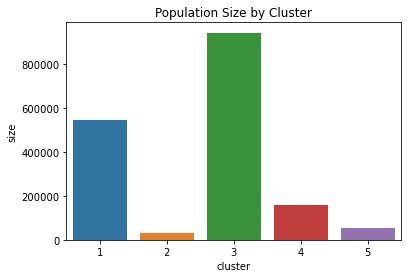

In [68]:
#Check size of each cluster - Are they all representative ?
import seaborn as sns
cluster_size = []
for centroid, cluster_df in fktp_segm_pca_kmeans.groupby("Segment"):
        cluster_size.append([centroid, len(cluster_df)])
cluster_sizes = pd.DataFrame(cluster_size, columns = ["cluster", "size"])
cluster_sizes.set_index("cluster", drop = True, inplace = True)
sns.barplot(x=cluster_sizes.index, y='size', data=cluster_sizes)
plt.title('Population Size by Cluster')
plt.show()

In [69]:
fktp_segm_pca_kmeans['Segment'].value_counts()

3    943709
1    545771
4    160192
5     51662
2     32421
Name: Segment, dtype: int64

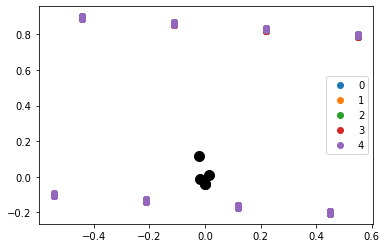

In [70]:
# Getting the Centroids
centroids = kmeans_pca_5.cluster_centers_
X = np.array(final_attribut)
label = kmeans_pca_5.labels_
u_labels = np.unique(label)

#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()

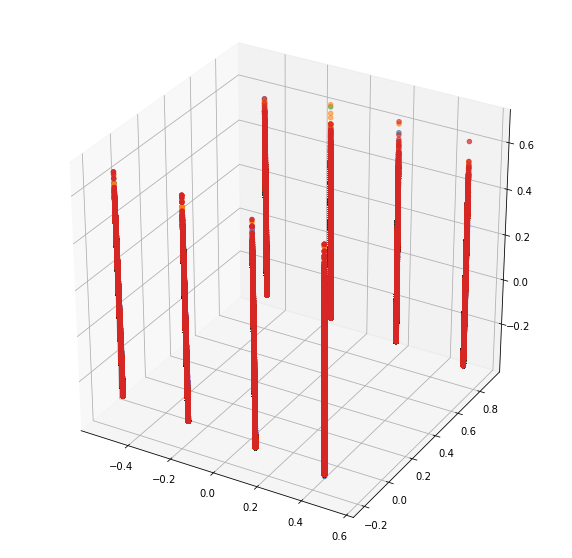

In [71]:
label = kmeans_pca_6.labels_
X = np.array(final_attribut)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[label == 0,0],X[label == 0,1],X[label == 0,2])
ax.scatter(X[label == 1,0],X[label == 1,1],X[label == 1,2])
ax.scatter(X[label == 2,0],X[label == 2,1],X[label == 2,2])
ax.scatter(X[label == 3,0],X[label == 3,1],X[label == 3,2])
ax.scatter(X[label == 4,0],X[label == 4,1],X[label == 4,2])
#ax.scatter(X[label == 5,0],X[label == 5,1],X[label == 5,2])
# ax.scatter(final_principal[label == 5,0],final_principal[label == 5,1],final_principal[label == 5,2])

In [72]:
fktp_segm_pca_kmeans.to_csv('E:/Mata Kuliah/Semester 8/TugasAkhir II/Week 16/Data/2/fktp_hasil_cluster_mca+pca_5.csv')

In [73]:
fktp_segm_pca_kmeans.drop(['Unnamed: 0','Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8', 'Cluster', 'Segment'], axis=1, inplace=True)

In [74]:
fktp_segm_pca_kmeans = pd.concat([fktp_not_transform.reset_index(drop = True), pd.DataFrame(final_attribut)], axis = 1)
fktp_segm_pca_kmeans.columns.values[-8: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8']

fktp_segm_pca_kmeans['Cluster'] = kmeans_pca_4.labels_

In [75]:
fktp_segm_pca_kmeans['Segment'] = fktp_segm_pca_kmeans['Cluster'].map({0:'1', 1:'2', 2:'3', 3:'4'})

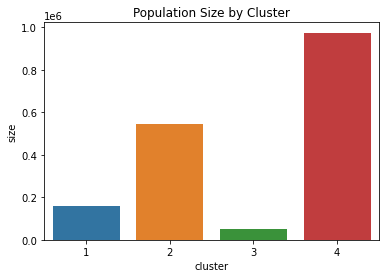

In [76]:
#Check size of each cluster - Are they all representative ?
import seaborn as sns
cluster_size = []
for centroid, cluster_df in fktp_segm_pca_kmeans.groupby("Segment"):
        cluster_size.append([centroid, len(cluster_df)])
cluster_sizes = pd.DataFrame(cluster_size, columns = ["cluster", "size"])
cluster_sizes.set_index("cluster", drop = True, inplace = True)
sns.barplot(x=cluster_sizes.index, y='size', data=cluster_sizes)
plt.title('Population Size by Cluster')
plt.show()

In [77]:
fktp_segm_pca_kmeans['Segment'].value_counts()

4    975059
2    545952
1    161061
3     51683
Name: Segment, dtype: int64

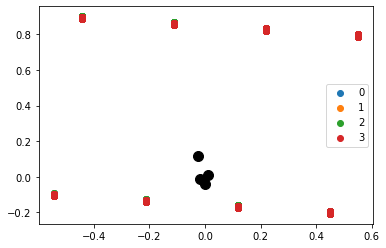

In [78]:
# Getting the Centroids
centroids = kmeans_pca_4.cluster_centers_
X = np.array(final_attribut)
label = kmeans_pca_4.labels_
u_labels = np.unique(label)

#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()

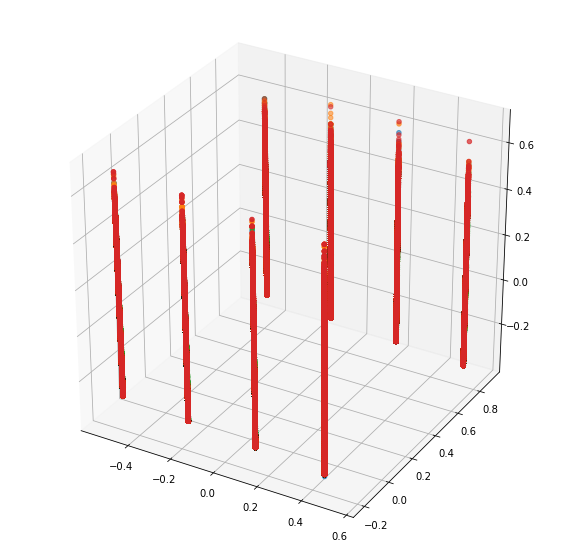

In [79]:
label = kmeans_pca_4.labels_
X = np.array(final_attribut)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[label == 0,0],X[label == 0,1],X[label == 0,2])
ax.scatter(X[label == 1,0],X[label == 1,1],X[label == 1,2])
ax.scatter(X[label == 2,0],X[label == 2,1],X[label == 2,2])
ax.scatter(X[label == 3,0],X[label == 3,1],X[label == 3,2])
ax.scatter(X[label == 4,0],X[label == 4,1],X[label == 4,2])
# ax.scatter(X[label == 5,0],X[label == 5,1],X[label == 5,2])
# ax.scatter(final_principal[label == 5,0],final_principal[label == 5,1],final_principal[label == 5,2])

In [80]:
fktp_segm_pca_kmeans.to_csv('E:/Mata Kuliah/Semester 8/TugasAkhir II/Week 16/Data/2/fktp_hasil_cluster_mca+pca_4.csv')

In [81]:
fktp_segm_pca_kmeans.drop(['Unnamed: 0','Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8', 'Cluster', 'Segment'], axis=1, inplace=True)

In [82]:
fktp_segm_pca_kmeans = pd.concat([fktp_not_transform.reset_index(drop = True), pd.DataFrame(final_attribut)], axis = 1)
fktp_segm_pca_kmeans.columns.values[-8: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8']

fktp_segm_pca_kmeans['Cluster'] = kmeans_pca.labels_

In [83]:
fktp_segm_pca_kmeans['Segment'] = fktp_segm_pca_kmeans['Cluster'].map({0:'1', 1:'2', 2:'3'})

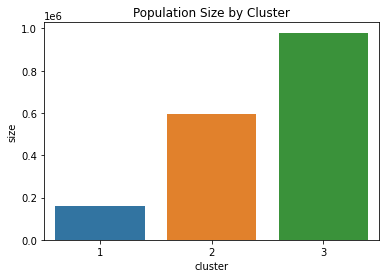

In [84]:
#Check size of each cluster - Are they all representative ?
import seaborn as sns
cluster_size = []
for centroid, cluster_df in fktp_segm_pca_kmeans.groupby("Segment"):
        cluster_size.append([centroid, len(cluster_df)])
cluster_sizes = pd.DataFrame(cluster_size, columns = ["cluster", "size"])
cluster_sizes.set_index("cluster", drop = True, inplace = True)
sns.barplot(x=cluster_sizes.index, y='size', data=cluster_sizes)
plt.title('Population Size by Cluster')
plt.show()

In [85]:
fktp_segm_pca_kmeans['Segment'].value_counts()

3    979521
2    592789
1    161445
Name: Segment, dtype: int64

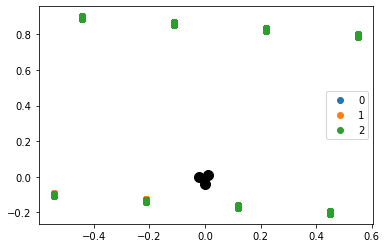

In [86]:
# Getting the Centroids
centroids = kmeans_pca.cluster_centers_
X = np.array(final_attribut)
label = kmeans_pca.labels_
u_labels = np.unique(label)

#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()

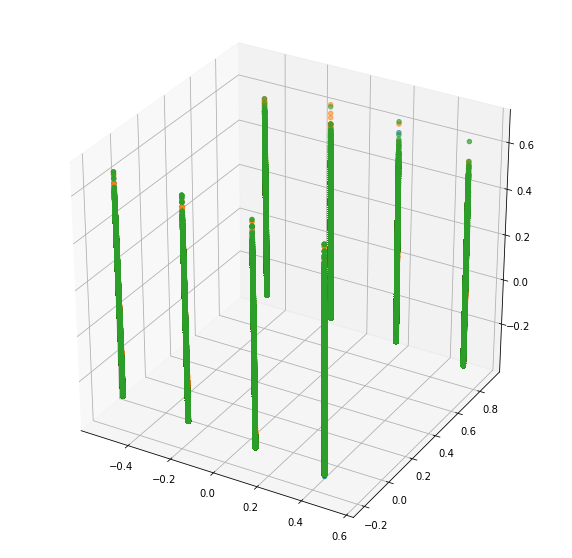

In [87]:
label = kmeans_pca.labels_
X = np.array(final_attribut)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[label == 0,0],X[label == 0,1],X[label == 0,2])
ax.scatter(X[label == 1,0],X[label == 1,1],X[label == 1,2])
ax.scatter(X[label == 2,0],X[label == 2,1],X[label == 2,2])
#ax.scatter(X[label == 3,0],X[label == 3,1],X[label == 3,2])
#ax.scatter(X[label == 4,0],X[label == 4,1],X[label == 4,2])
# ax.scatter(X[label == 5,0],X[label == 5,1],X[label == 5,2])
# ax.scatter(final_principal[label == 5,0],final_principal[label == 5,1],final_principal[label == 5,2])

In [88]:
fktp_segm_pca_kmeans.to_csv('E:/Mata Kuliah/Semester 8/TugasAkhir II/Week 16/Data/2/fktp_hasil_cluster_mca+pca_3.csv')

In [81]:
from sklearn.metrics import silhouette_score

print(silhouette_score(final_attribut, kmeans_pca_6.labels_))

0.3881782521463137
